In [9]:
import os
import gsw
import datetime
import numpy as np
import numpy as np
import pandas as pd
import seawater as sw
#import cmocean.cm as cmo
import matplotlib.pyplot as plt

In [11]:
from glob import glob
from scipy.io import loadmat
#from pymatreader import read_mat
from mpl_toolkits import mplot3d
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
from scipy.ndimage import gaussian_filter1d as gfilter
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

In [23]:
mat_data = loadmat('/Users/sydneyperkins/Downloads/ASTRAL_DBASIS_upper_CTDgrid.mat')
key = list(mat_data.keys())[-1]
data = mat_data[key][0]
time = data['std_profiles'][0]['time'][0][0].squeeze()
time = time[2:] # Removing areas with no data in the vector\n",
time = pd.to_datetime(time-719529, unit='D') # transforming the matlab time format (datenum) to the python time format (datetime)
time = np.delete(time,[927, 3780, 3781], 0) #deleting bad profiles
depth = data['std_profiles'][0]['P'][0][0];
depth = depth[20:381,2:] # Removing areas with no data
depth = np.delete(depth,[927, 3780, 3781], 1) #deleting bad profiles
vmin, vmax = np.round(np.nanmin(depth),2), np.round(np.nanmax(depth),2)
delta = .25
depth = np.arange(vmin, vmax + delta, delta) #recreating a depth vector that makes sense
time, depth = np.meshgrid(time, depth)
rho = data['std_profiles'][0]['rho'][0][0]; rho = rho[20:381,2:]
#potential density
rho = np.delete(rho,[927, 3780, 3781], 1) #deleting bad profiles
sigma = rho-1e3
insitutemp = data['std_profiles'][0]['T'][0][0]
insitutemp = insitutemp[20:381,2:]
insitutemp[20:381,2:] # in-situ temperature
insitutemp = np.delete(insitutemp,[927, 3780, 3781], 1)
#deleting bad profiles
SP = data['std_profiles'][0]['S'][0][0]; SP = SP[20:381,2:] #practical salinity
SP = np.delete(SP,[927, 3780, 3781], 1) #deleting bad profiles
P = data['std_profiles'][0]['P'][0][0]; P = P[20:381,2:] #Pressure
P = np.delete(P,[927, 3780, 3781], 1) #deleting bad profiles
SA = gsw.SA_from_SP(SP, depth, 85, 12) # computing absolutesalinity
temp = gsw.CT_from_t(SA, insitutemp, depth) # computingconservative temperature
gswrho = gsw.rho(SA,temp,P)
timez= time[1,:]

In [24]:
depth26 = []
for i in range(temp.shape[1]):
    temp_profile= temp[:,i]
    index = np.argwhere(temp_profile > 26).argmax()
    depth26.append(depth[index,i])

In [31]:
#Finding data points that are below 60 to find error
depth26= np.array(depth26)
indices = np.where(depth26 < 60)[0]
print(indices)
#temp[:,927]
#depth26[927], depth26[3778], depth26[373]

[]


In [32]:
overallmeantemp_premonsoon = np.nanmean(temp[:,1:539])
overallmeanSA_premonsoon = np.nanmean(SA[:,1:539])
overallmeanrho_promonsoon = np.nanmean(rho[:,1:539])

overallmeantemp_cyclone= np.nanmean(temp[:,540:1554])
overallmeanSA_cyclone= np.nanmean(SA[:,540:1554])
overallmeanrho_cyclone= np.nanmean(rho[:,540:1554])

overallmeantemp_recovery= np.nanmean(temp[:,1555:2772])
overallmeanSA_recovery= np.nanmean(SA[:,1555:2772])
overallmeanrho_recovery= np.nanmean(rho[:,1555:2772])

overallmeantemp_winds= np.nanmean(temp[:,2773:3781])
overallmeanSA_winds= np.nanmean(SA[:,2773:3781])
overallmeanrho_winds= np.nanmean(rho[:,2773:3781])

In [33]:
mean_temp_premonsoon = np.nanmean(temp[:,0:539], axis=1).squeeze()
mean_temp_cyclone = np.nanmean(temp[:,540:1554], axis=1).squeeze()
mean_temp_recovery = np.nanmean(temp[:,1555:2772], axis=1).squeeze()
mean_temp_winds = np.nanmean(temp[:,2773:3781], axis=1).squeeze()

mean_rho_premonsoon = np.nanmean(rho[:,0:539], axis=1).squeeze()
mean_rho_cyclone = np.nanmean(rho[:,540:1554], axis=1).squeeze()
mean_rho_recovery = np.nanmean(rho[:,1555:2772], axis=1).squeeze()
mean_rho_winds = np.nanmean(rho[:,2773:3781], axis=1).squeeze()

mean_SA_premonsoon = np.nanmean(SA[:,0:539], axis=1).squeeze()
mean_SA_cyclone = np.nanmean(SA[:,540:1554], axis=1).squeeze()
mean_SA_recovery = np.nanmean(SA[:,1555:2772], axis=1).squeeze()
mean_SA_winds = np.nanmean(SA[:,2773:3781], axis=1).squeeze()

z = depth[:,0]

In [34]:
premonsoonrho= rho[:,0:539]
premonsoonrho= premonsoonrho.squeeze()
cyclonerho= rho[:,540:1554]
cyclonerho=cyclonerho.squeeze()
recoveryrho= rho[:,1555:2772]
recoveryrho= recoveryrho.squeeze()
windsrho= rho[:,2773:3799]
windsrho= windsrho.squeeze()

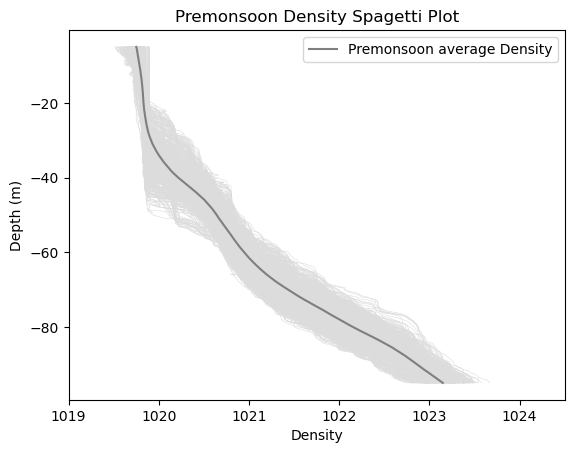

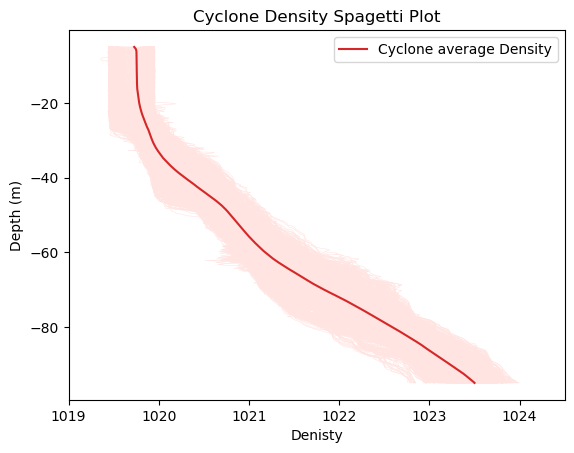

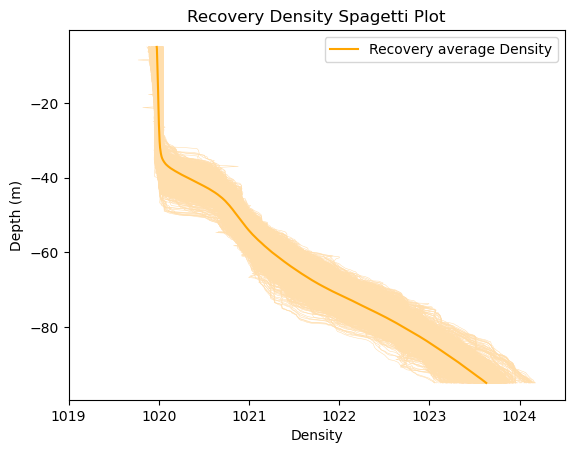

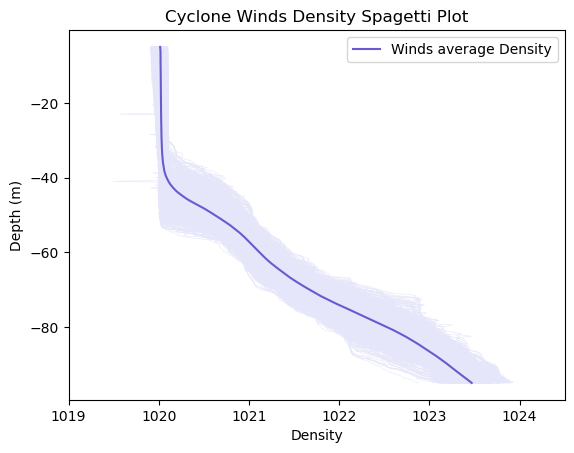

In [35]:
# plt.subplot(2, 2, 1)
# plt.tight_layout()
plt.plot(premonsoonrho, -z, color='gainsboro',linewidth = .4 )
plt.plot(mean_rho_premonsoon, -z, color='tab:grey',linewidth =
1.5, label= 'Premonsoon average Density')
plt.legend() # Setting the x-axis limits
plt.xlabel('Density')
plt.ylabel('Depth (m)')
plt.title('Premonsoon Density Spagetti Plot')
plt.xlim(1019, 1024.5)

plt.show()
# plt.subplot(2, 2, 2)
plt.plot(cyclonerho, -z, color='mistyrose',linewidth = .4 )
plt.plot(mean_rho_cyclone, -z, color='tab:red',linewidth = 1.5,
label= 'Cyclone average Density')
plt.legend()
plt.xlabel('Denisty')
plt.ylabel('Depth (m)')
plt.title('Cyclone Density Spagetti Plot')
plt.xlim(1019, 1024.5)
plt.show()
plt.plot(recoveryrho, -z, color='navajowhite',linewidth = .4 )
plt.plot(mean_rho_recovery, -z, color='orange',linewidth = 1.5,
label= 'Recovery average Density')
plt.legend()
plt.xlabel('Density')
plt.ylabel('Depth (m)')
plt.title('Recovery Density Spagetti Plot')
plt.xlim(1019, 1024.5)
plt.show()
plt.plot(windsrho, -z, color='lavender',linewidth = .4 )
plt.plot(mean_rho_winds, -z, color='slateblue',linewidth = 1.5,
label= 'Winds average Density')
plt.legend()\
# Setting the x-axis limits
plt.xlabel('Density')
plt.ylabel('Depth (m)')
plt.title('Cyclone Winds Density Spagetti Plot')
plt.xlim (1019, 1024.5)
plt.show()

In [40]:
depth26= []
index26 = []
for i in range(temp.shape[1]):
    temp_profile= temp[:,i] #creating time profiles
    index26nonvect = np.argwhere(temp_profile > 26).argmax() # index where the first temp that is greater that 26 is
    index26.append(index26nonvect) #making a list of the indexes
    depth26.append(depth[index26nonvect,i]) #making a list of the depths

len(depth26)
mldindex125 = []
mldrho125 = []

for i in range(rho.shape[1]):
    chai = np.where(~np.isnan(rho[:,i]))[0] #
    firstrho125 = rho[chai, i]
    mlrho125 = firstrho125[0]+.125
    indexmldrho125= np.argmax(firstrho125 >= mlrho125)
    mldindex125.append(indexmldrho125)
    mldrho125.append(depth[chai[indexmldrho125], i])

In [41]:
premonsoontemp= temp[:,0:539]
premonsoontemp= premonsoontemp.squeeze()
cyclonetemp= temp[:,540:1554]
cyclonetemp=cyclonetemp.squeeze()
recoverytemp= temp[:,1555:2772]
recoverytemp= recoverytemp.squeeze()
windstemp= temp[:,2773:3799]
windstemp= windstemp.squeeze()

precyclonemld = np.mean(mldrho125[0:539])
cyclonemld= np.mean(mldrho125[540:1554])
recoverymld= np.mean(mldrho125[1555:2772])
postwindsmld = np.mean(mldrho125[2773:3179])
precyclone26 = np.mean(depth26[0:539])
cyclone26= np.mean(depth26[540:1554])
recovery26= np.mean(depth26[1555:2772])
postwinds26 = np.mean(depth26[2773:3179])

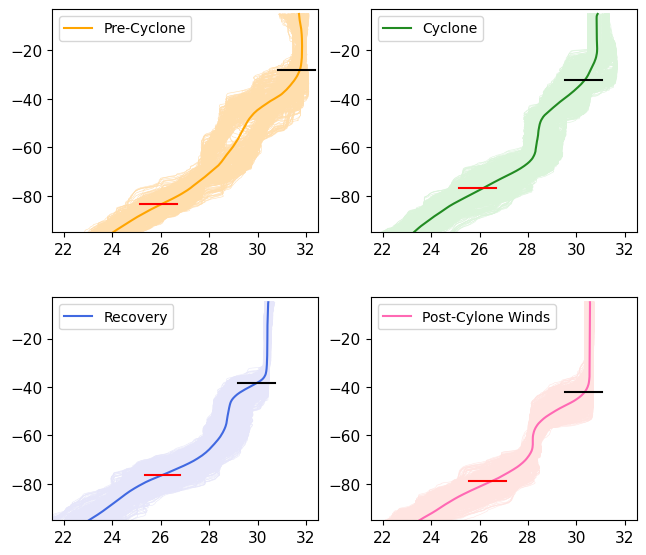

In [44]:
plt.figure(figsize=(7, 6))
plt.subplot(2, 2, 1)
plt.tight_layout(pad = 3)
plt.plot(premonsoontemp, -z, color='navajowhite',linewidth =.4 )
plt.plot(mean_temp_premonsoon, -z, color='orange',linewidth = 1.5, label= 'Pre-Cyclone')
plt.axhline(y = -precyclonemld, xmin=.85, xmax=.99, zorder= 5, color = 'black')
plt.axhline(y = -precyclone26, xmin=.33, xmax=.47, zorder= 5, color = 'red')
plt.legend()
# plt.xlabel('Temperature', fontsize = 11)
# plt.ylabel('Depth (m)', fontsize = 12)
# plt.title('Premonsoon', fontsize = 10)
plt.xlim(21.5, 32.5)
plt.ylim(-95,-3)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)

plt.subplot(2, 2, 2)
plt.plot(cyclonetemp, -z, color=(.860, .955, .860),linewidth = .4 )
plt.plot(mean_temp_cyclone, -z, color='forestgreen',linewidth = 1.5, label= 'Cyclone')
plt.axhline(y = -cyclonemld, xmin=.73, xmax=.87, zorder= 5,color = 'black')
plt.axhline(y = -cyclone26, xmin=.33, xmax=.47, zorder= 5, color = 'red')
plt.legend()
# plt.xlabel('Temperature')
# plt.ylabel('Depth (m)')
# plt.title('Cyclone', fontsize = 10)
plt.xlim(21.5, 32.5)
plt.ylim(-95,-3)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
# plt.show()

plt.subplot(2, 2, 3)
plt.plot(recoverytemp, -z, color='lavender',linewidth = .4 )
plt.plot(mean_temp_recovery, -z, color='royalblue',linewidth = 1.5, label= 'Recovery')
plt.axhline(y = -recoverymld, xmin=.70, xmax=.84, zorder= 5, color = 'black')
plt.axhline(y = -recovery26, xmin=.35, xmax=.48, zorder= 5, color = 'red')
plt.legend()
# plt.xlabel('Temperature')
# plt.ylabel('Depth (m)')
# plt.title('Recovery', fontsize = 10)
plt.xlim(21.5, 32.5)
plt.ylim(-95,-3)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
# plt.show()

plt.subplot(2, 2, 4)
plt.plot(windstemp, -z, color='mistyrose',linewidth = .4 )
plt.plot(mean_temp_winds, -z, color='hotpink',linewidth = 1.5, label= 'Post-Cylone Winds')
plt.axhline(y = -postwindsmld, xmin=.73, xmax=.87, zorder= 5, color = 'black')
plt.axhline(y = -postwinds26, xmin=.37, xmax=.51, zorder= 5, color = 'red')
plt.legend()
# plt.xlabel('Temperature', fontsize = 11)
# plt.ylabel('Depth (m)', fontsize = 12)
# plt.title('Cyclone Winds', fontsize = 10)
plt.xlim(21.5, 32.5)
plt.ylim(-95,-3)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.savefig('temp-profiles.png', dpi= 700)
plt.show()
